<a href="https://colab.research.google.com/github/lmedina1870/Files/blob/main/Network%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and Imports

In [ ]:
!pip install nxviz==0.6.3

In [15]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import nxviz
from nxviz import CircosPlot
import matplotlib.patches as mpatches
import seaborn as sns
from unidecode import unidecode

Import csv

In [17]:
airports_coordenates_db = pd.read_csv("anac/AerodromosPublicos.csv",encoding='latin-1',sep=';')

traffic_db_2018 = pd.read_csv("anac/resumo_anual_2018.csv", encoding="Latin-1", sep=';')

 Cleaning columns name

In [18]:
def clean_col(col):
    col = col.strip()
    col = col.replace("(","")
    col = col.replace(")","")
    col = col.replace(" ","_")
    col = unidecode(col)
    col = col.lower()
    return col


In [19]:
airports_coordenates_db.columns = [clean_col(c) for c in airports_coordenates_db.columns]
airports_coordenates_db.columns.tolist()

['codigo_oaci',
 'ciad',
 'nome',
 'municipio',
 'uf',
 'municipio_servido',
 'uf_servido',
 'latgeopoint',
 'longeopoint',
 'latitude',
 'longitude',
 'altitude',
 'operacao_diurna',
 'operacao_noturna',
 'designacao_1',
 'comprimento_1',
 'largura_1',
 'resistencia_1',
 'superficie_1',
 'designacao_2',
 'comprimento_2',
 'largura_2',
 'resistencia_2',
 'superficie_2',
 'situacao',
 'validade_do_registro',
 'portaria_de_registro',
 'link_portaria']

In [25]:
airports_coordenates = airports_coordenates_db.iloc[:,[0,2,3,4,7,8]].copy()
airports_coordenates.columns = ["airport_code", "airport_name", "city", "state", "lat", "lon"]
airports_coordenates.head()

,airport_code,airport_name,city,state,lat,lon
0,SBRB,Plácido de Castro,RIO BRANCO,Acre,-98683333,-67898056
1,SNGA,Guarapari,GUARAPARI,Espírito Santo,-20646389,-40491667
2,SBIZ,Prefeito Renato Moreira,IMPERATRIZ,Maranhão,-55305556,-47458333
3,SBPC,Embaixador Walther Moreira Salles,POÇOS DE CALDAS,Minas Gerais,-21837778,-46566111
4,SSCD,Chapadão do Sul,CHAPADÃO DO SUL,Mato Grosso do Sul,-18839167,-52488056


In [24]:
traffic_db_2018.columns = [clean_col(c) for c in traffic_db_2018.columns]
traffic_db_2018.columns.tolist()

['empresa_sigla',
 'empresa_nome',
 'empresa_nacionalidade',
 'ano',
 'mes',
 'aeroporto_de_origem_sigla',
 'aeroporto_de_origem_nome',
 'aeroporto_de_origem_uf',
 'aeroporto_de_origem_regiao',
 'aeroporto_de_origem_pais',
 'aeroporto_de_origem_continente',
 'aeroporto_de_destino_sigla',
 'aeroporto_de_destino_nome',
 'aeroporto_de_destino_uf',
 'aeroporto_de_destino_regiao',
 'aeroporto_de_destino_pais',
 'aeroporto_de_destino_continente',
 'natureza',
 'grupo_de_voo',
 'passageiros_pagos',
 'passageiros_gratis',
 'carga_paga_kg',
 'carga_gratis_kg',
 'correio_kg',
 'ask',
 'rpk',
 'atk',
 'rtk',
 'combustivel_litros',
 'distancia_voada_km',
 'decolagens',
 'carga_paga_km',
 'carga_gratis_km',
 'correio_km',
 'assentos',
 'payload',
 'horas_voadas',
 'bagagem_kg']

In [23]:
traffic_2018 = traffic_db_2018.iloc[:,[5,11,17]].copy()
traffic_2018.columns = ["airport_origin_code", "airport_destination_code", "nature"]
traffic_2018 = traffic_2018.loc[traffic_2018.nature == "INTERNACIONAL",:].iloc[:,[0,1]].copy()
traffic_2018.head()

,airport_origin_code,airport_destination_code
311,SBBH,SBPC
312,SBBH,SBVG
313,SBBH,SNAR
314,SBBH,SNCT
315,SBBH,SNDT


Creating nx graph

In [27]:
#Creating graph
G_2018 = nx.Graph()
for index, row in airports_coordenates.iterrows():
  G_2018.add_node(row['airport_code'], airport_name=row['airport_name'], lat=row['lat'], lon=row['lon'], city=row['city'], state=row['state'])

for index, row in traffic_2018.iterrows():
  G_2018.add_edge(row['airport_origin_code'], row['airport_destination_code'])

for n, d in G_2018.nodes(data=True):
    G_2018.nodes[n]["class"] = G_2018.degree(n)

G_2018.number_of_nodes()

505

In [29]:
#Removing isolated nodes from the graph
G_2018.remove_nodes_from(list(nx.isolates(G_2018)))
G_2018.number_of_nodes()


146

In [31]:
G_2018.number_of_edges()

1035

Network Analysis

NX Eccentricity/Diameter

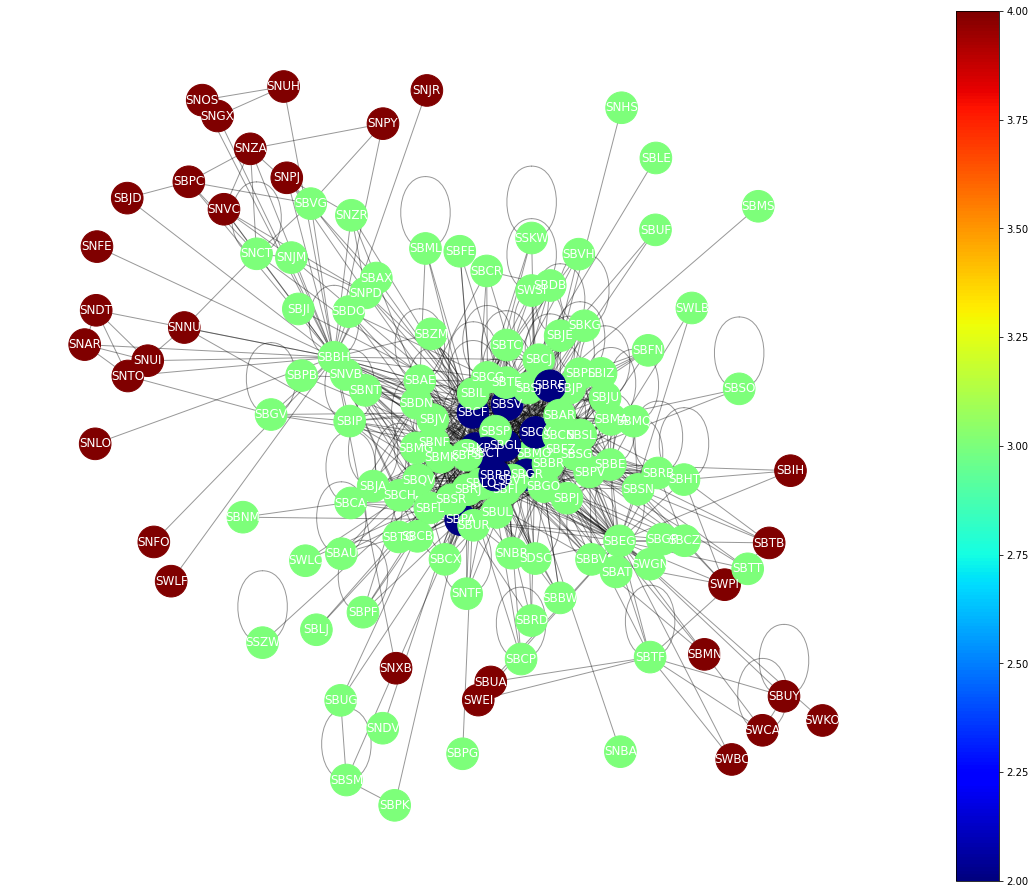

In [35]:
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G_2018,seed=123456789,k=0.3)
# color of nodes based on eccentricity
color = list(dict(nx.eccentricity(G_2018)).values())

# draw edges
nx.draw_networkx_edges(G_2018,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2018, 
                node_size=1000,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_2018, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eccentricity.png', transparent=True,dpi=300)
plt.show()

In [36]:
# the diameter of networks is the maximum eccentricy
print("Diameter of network (2018): {}".format(nx.diameter(G_2018)))

# whom are in the diamter
print([k for k,v in nx.eccentricity(G_2018).items() if v == nx.diameter(G_2018)])

Diameter of network (2018): 4
['SBPC', 'SNGX', 'SBJD', 'SWPI', 'SNOS', 'SNXB', 'SNAR', 'SNPY', 'SNJR', 'SBIH', 'SNDT', 'SWKO', 'SNNU', 'SNLO', 'SWCA', 'SNPJ', 'SWEI', 'SNTO', 'SNFE', 'SNUH', 'SBUA', 'SWBC', 'SBTB', 'SNVC', 'SNZA', 'SNFO', 'SNUI', 'SWLF', 'SBUY', 'SBMN']


Degree Centrality

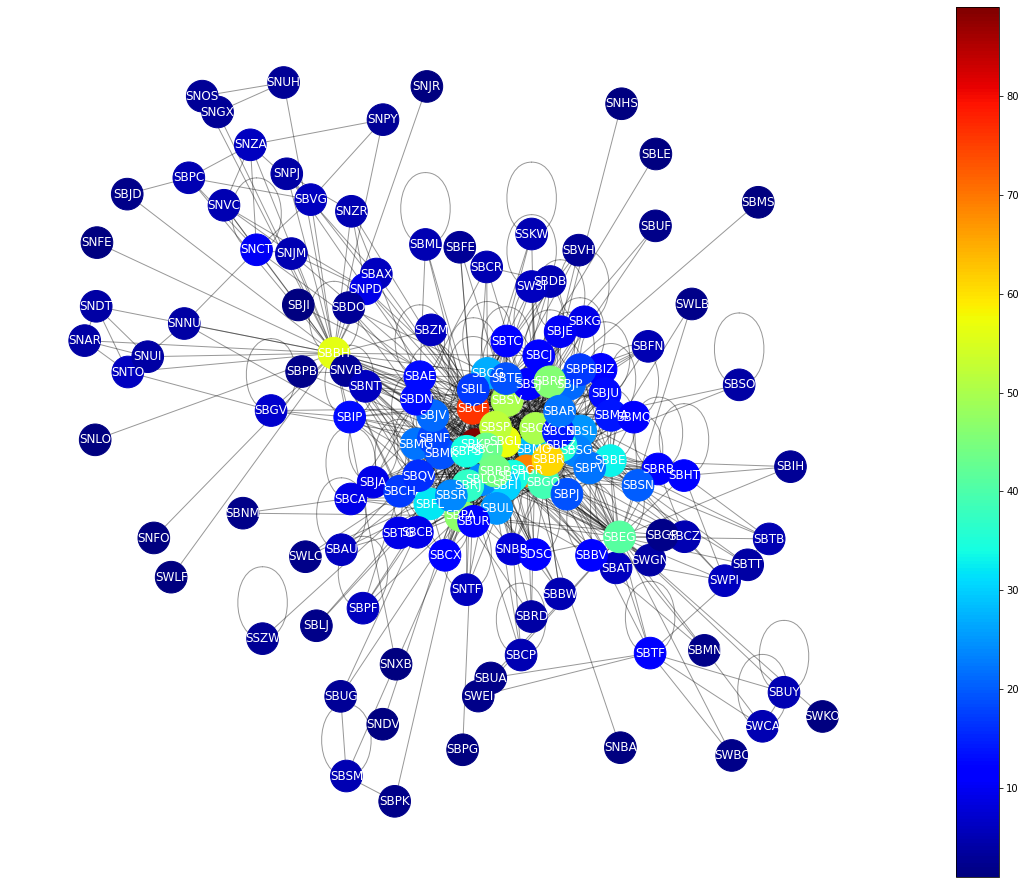

In [38]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G_2018,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(G_2018)).values())

# draw edges
nx.draw_networkx_edges(G_2018,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2018,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_2018, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()